In [1]:
#ASSIGNMENT WALKTHROUGH:
'''
Boombikes has decided to come up with a mindful business plan to be able to 
accelerate its revenue as soon as the ongoing lockdown comes to an end, and the 
economy restores to a healthy state. 
Boombikes aspires to understand the demand for shared bikes among the people 
after this ongoing quarantine situation ends across the nation understand the 
factors on which the demand for these shared bikes depends.
Specifically, they want to understand the factors affecting the demand for 
these shared bikes in the American market.

Focus on these two:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

Model the demand for shared bikes with the available independent variables. 
It will be used by the management to understand how exactly the demands vary 
with different features. 
They can accordingly manipulate the business strategy to meet the demand levels 
and meet the customer's expectations. 
Further, the model will be a good way for management to understand the demand 
dynamics of a new market. 

cnt is the target variable 
'''

"\nBoombikes has decided to come up with a mindful business plan to be able to \naccelerate its revenue as soon as the ongoing lockdown comes to an end, and the \neconomy restores to a healthy state. \nBoombikes aspires to understand the demand for shared bikes among the people \nafter this ongoing quarantine situation ends across the nation understand the \nfactors on which the demand for these shared bikes depends.\nSpecifically, they want to understand the factors affecting the demand for \nthese shared bikes in the American market.\n\nFocus on these two:\nWhich variables are significant in predicting the demand for shared bikes.\nHow well those variables describe the bike demands\n\nModel the demand for shared bikes with the available independent variables. \nIt will be used by the management to understand how exactly the demands vary \nwith different features. \nThey can accordingly manipulate the business strategy to meet the demand levels \nand meet the customer's expectations. 

In [2]:
# importing libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [3]:
# importing all the necessary classes and methods from the libraries that will 
# be used in the course of this assignment 
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [6]:
# import warnings library to suppress warnings later on
import warnings
warnings.filterwarnings('ignore')

In [7]:
# reading the data
path = r'D:\Everything_Tech\Python_DS__ML\upGrad_ML_AI\Course_3\Module_2_Linear__Regression_Assignment\Docs'
df = pd.read_csv(path + "\Bike_Sharing_Dataset.csv")

In [8]:
# understanding the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
df.shape

(730, 16)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
df.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [13]:
# there are many columns that seem outright useless for our analysis. We will drop them
# weekday is dropped because all the weekdays have the same frequency of occurence 
df = df.drop(['casual', 'registered', 'instant', 'dteday', 'weekday'], axis = 1)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [14]:
# renaming certain column labels for better understanding 
df=df.rename(columns = {'yr':'year', 'mnth':'month', 'weathersit':'weather', 
                        'temp':'temperature', 'cnt':'count', 'hum':'humidity'})

In [15]:
# some categorical variables need to be reverse encoded
df.season = df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
df.weather = df['weather'].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})
df.month = df['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [16]:
#  bar plottin the categorical variables

<AxesSubplot:xlabel='season', ylabel='count'>

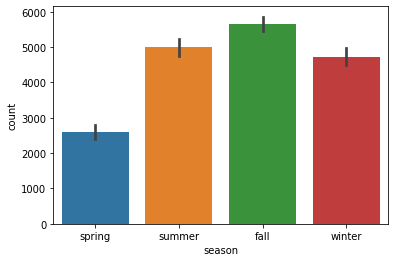

In [17]:
# more demand of bikes is observed during the fall 
sns.barplot('season','count',data=df)

<AxesSubplot:xlabel='weather', ylabel='count'>

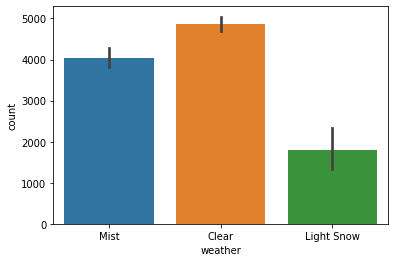

In [18]:
# demand of bikes increases when the weather is clear
sns.barplot('weather','count',data=df)

<AxesSubplot:xlabel='workingday', ylabel='count'>

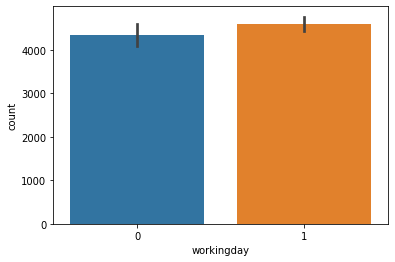

In [19]:
# there is not much difference between the demand on a workday or a non working day but non working days saw more demand
sns.barplot('workingday','count',data=df)

<AxesSubplot:xlabel='year', ylabel='count'>

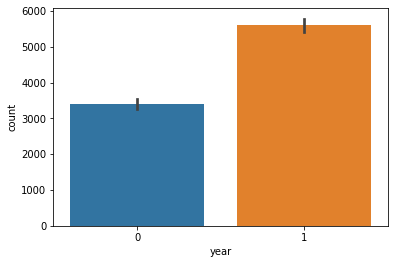

In [20]:
# the demand has been increasing as it was more in the year 2019 (1) than in 2018 (0)
sns.barplot('year','count',data=df)

<AxesSubplot:xlabel='month', ylabel='count'>

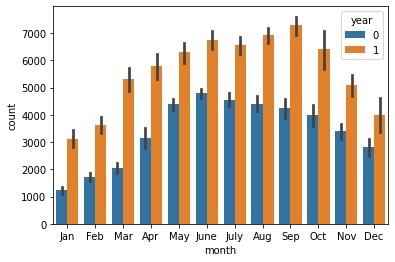

In [21]:
# the same rule as above, yearly demand keeps increasing 
sns.barplot('month','count',hue='year',data=df)

<AxesSubplot:xlabel='holiday'>

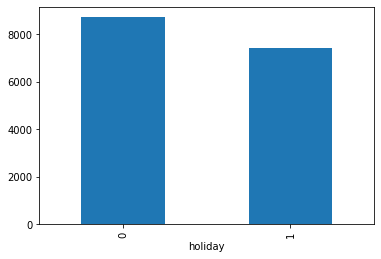

In [22]:
# the demand increases when it is a holiday
df.groupby('holiday')['count'].max().plot(kind='bar')

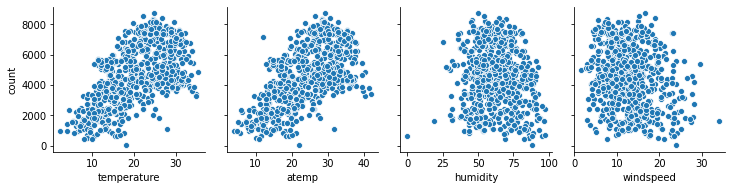

In [23]:
# scatter plotting the numerical variables
sns.pairplot(df, x_vars = ['temperature','atemp','humidity','windspeed'], y_vars = 'count', aspect = 1, kind = 'scatter')

<AxesSubplot:>

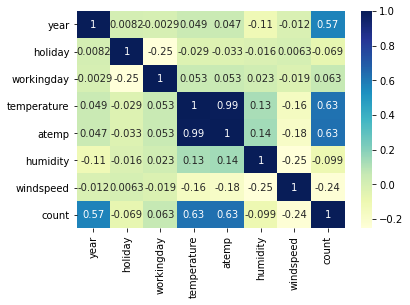

In [24]:
# heatmapping all the numerical variables to find correlation trends
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

In [25]:
# atemp has a high correlation with temp so it can be dropped
df = df.drop('atemp', axis = 1)

In [26]:
# now we create dummy variables for the categorical variables
df = pd.concat([df, pd.get_dummies(df['season'], drop_first = True)], axis = 1)
df = pd.concat([df, pd.get_dummies(df['month'], drop_first = True)], axis = 1)
df = pd.concat([df, pd.get_dummies(df['weather'], drop_first = True)], axis = 1)

# we drop the original variables 
df.drop(['season', 'month', 'weather', 'workingday'], axis = 1, inplace = True)

In [27]:
# now we split the dataset into test and train
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
# now we use StandardScaling to scale the numeric values
scaler = StandardScaler()
numericals=['temperature','humidity','windspeed','count']
df_train[numericals] = scaler.fit_transform(df_train[numericals])

In [29]:
# splitting the train data into independent and target variables
y_train = df_train.pop('count')
y_train = y_train.values.reshape(-1, 1)
X_train = df_train

In [30]:
# creating a LinearRegressin object and fitting the variables on it
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# using Recursive Feature Elimination by first creating an object and then fitting 
# to that object the two X_train and y_train
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [32]:
# columns that came out selected by RFE are assigned here to col
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['humidity', 'Aug', 'June', 'Mar', 'May', 'Oct'], dtype='object')

In [33]:
# creating a dataframe with just the RFE selected variables 
X_train_rfe = X_train[col]

In [34]:
# creating a constant to the X_train_rfe dataframe
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.0
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          4.55e-186
Time:                        19:29:39   Log-Likelihood:                -254.93
No. Observations:                 510   AIC:                             541.9
Df Residuals:                     494   BIC:                             609.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.3499      0.068     -5.183      0.000      -0.483      -0.217
year            1.0457      0.036     28.805      0.000       0.974       1.117
holiday        -0.3976      0.116     -3.431      0.001      -0.625      -0.170
temperature     0.4232      0.038     11.263      0.000       0.349       0.497
windspeed      -0.1212      0.019     -6.368      0.000      -0.159      -0.084
spring         -0.2707      0.099     -2.726      0.007      -0.466      -0.076
summer          0.1326      0.069      1.910      0.057      -0.004       0.269
winter          0.3873      0.080      4.857      0.000       0.231       0.544
Dec            -0.2429      0.082     -2.946      0.003      -0.405      -0.081
Feb            -0.1744      0.098     -1.779      0.076      -0.367       0.018
Jan            -0.3170      0.097     -3.270      0.001      -0.508      -0.127
July           -0.2200      0.082     -2.675      0.008      -0.382      -0.058
Nov            -0.2099      0.086     -2.449      0.015      -0.378      -0.042
Sep             0.2971      0.076      3.905      0.000       0.148       0.447
Light Snow     -1.3094      0.109    -11.968      0.000      -1.524      -1.094
Mist           -0.3628      0.039     -9.374      0.000      -0.439      -0.287
==============================================================================
Omnibus:                       74.865   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.592
Skew:                          -0.745   Prob(JB):                     6.77e-42
Kurtosis:                       5.589   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# we remove Feb since its p value is high
X_train_rfe = X_train_rfe.drop('Feb', axis = 1)

In [37]:
# creating a constant to the X_train_rfe dataframe
X_train_sm1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm1).fit()

In [38]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.57e-186
Time:                        19:29:41   Log-Likelihood:                -256.56
No. Observations:                 510   AIC:                             543.1
Df Residuals:                     495   BIC:                             606.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.3687      0.067     -5.516      0.000      -0.500      -0.237
year            1.0442      0.036     28.709      0.000       0.973       1.116
holiday        -0.4097      0.116     -3.533      0.000      -0.637      -0.182
temperature     0.4401      0.036     12.083      0.000       0.369       0.512
windspeed      -0.1199      0.019     -6.290      0.000      -0.157      -0.082
spring         -0.3193      0.096     -3.337      0.001      -0.507      -0.131
summer          0.1483      0.069      2.148      0.032       0.013       0.284
winter          0.3951      0.080      4.951      0.000       0.238       0.552
Dec            -0.1985      0.079     -2.520      0.012      -0.353      -0.044
Jan            -0.2240      0.082     -2.738      0.006      -0.385      -0.063
July           -0.2245      0.082     -2.725      0.007      -0.386      -0.063
Nov            -0.1865      0.085     -2.198      0.028      -0.353      -0.020
Sep             0.3040      0.076      3.992      0.000       0.154       0.454
Light Snow     -1.3054      0.110    -11.908      0.000      -1.521      -1.090
Mist           -0.3630      0.039     -9.359      0.000      -0.439      -0.287
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# calculating the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.81
5,spring,5.21
3,temperature,4.10
7,winter,3.68
6,summer,2.73
11,Nov,1.75
9,Jan,1.67
8,Dec,1.48
10,July,1.48
12,Sep,1.33


In [40]:
# we remove spring since its vif is high
X_train_rfe = X_train_rfe.drop('spring', axis = 1)

In [41]:
# creating a constant to the X_train_rfe dataframe
X_train_sm1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm1).fit()

In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.9
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.65e-185
Time:                        19:30:38   Log-Likelihood:                -262.24
No. Observations:                 510   AIC:                             552.5
Df Residuals:                     496   BIC:                             611.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5437      0.042    -12.988      0.000      -0.626      -0.461
year            1.0385      0.037     28.296      0.000       0.966       1.111
holiday        -0.4283      0.117     -3.660      0.000      -0.658      -0.198
temperature     0.5238      0.027     19.637      0.000       0.471       0.576
windspeed      -0.1254      0.019     -6.539      0.000      -0.163      -0.088
summer          0.3069      0.051      6.064      0.000       0.207       0.406
winter          0.5740      0.060      9.609      0.000       0.457       0.691
Dec            -0.1699      0.079     -2.149      0.032      -0.325      -0.015
Jan            -0.2467      0.082     -2.994      0.003      -0.409      -0.085
July           -0.1697      0.082     -2.081      0.038      -0.330      -0.009
Nov            -0.1351      0.084     -1.602      0.110      -0.301       0.031
Sep             0.3797      0.073      5.170      0.000       0.235       0.524
Light Snow     -1.2900      0.111    -11.659      0.000      -1.507      -1.073
Mist           -0.3579      0.039     -9.142      0.000      -0.435      -0.281
==============================================================================
Omnibus:                       59.040   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.091
Skew:                          -0.650   Prob(JB):                     6.87e-28
Kurtosis:                       5.048   Cond. No.                         8.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# now we remove Nov as well since it is just at the margin at 0.5
X_train_rfe = X_train_rfe.drop('Nov', axis = 1)

In [44]:
# creating a constant to the X_train_rfe dataframe
X_train_sm1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm1).fit()

In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          6.40e-186
Time:                        19:30:40   Log-Likelihood:                -263.55
No. Observations:                 510   AIC:                             553.1
Df Residuals:                     497   BIC:                             608.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5514      0.042    -13.242      0.000      -0.633      -0.470
year            1.0386      0.037     28.254      0.000       0.966       1.111
holiday        -0.4495      0.116     -3.861      0.000      -0.678      -0.221
temperature     0.5318      0.026     20.263      0.000       0.480       0.583
windspeed      -0.1255      0.019     -6.530      0.000      -0.163      -0.088
summer          0.3120      0.051      6.170      0.000       0.213       0.411
winter          0.5252      0.051     10.206      0.000       0.424       0.626
Dec            -0.1215      0.073     -1.660      0.097      -0.265       0.022
Jan            -0.2274      0.082     -2.786      0.006      -0.388      -0.067
July           -0.1741      0.082     -2.133      0.033      -0.335      -0.014
Sep             0.3921      0.073      5.361      0.000       0.248       0.536
Light Snow     -1.2778      0.111    -11.558      0.000      -1.495      -1.061
Mist           -0.3558      0.039     -9.080      0.000      -0.433      -0.279
==============================================================================
Omnibus:                       55.258   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.630
Skew:                          -0.625   Prob(JB):                     3.49e-25
Kurtosis:                       4.933   Cond. No.                         8.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# now we remove Dec since its p values are high
X_train_rfe = X_train_rfe.drop('Dec', axis = 1)

In [47]:
# creating a constant to the X_train_rfe dataframe
X_train_sm1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm1).fit()

In [48]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.3
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.63e-186
Time:                        19:30:42   Log-Likelihood:                -264.96
No. Observations:                 510   AIC:                             553.9
Df Residuals:                     498   BIC:                             604.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5649      0.041    -13.805      0.000      -0.645      -0.485
year            1.0388      0.037     28.211      0.000       0.966       1.111
holiday        -0.4432      0.117     -3.802      0.000      -0.672      -0.214
temperature     0.5438      0.025     21.516      0.000       0.494       0.593
windspeed      -0.1221      0.019     -6.380      0.000      -0.160      -0.085
summer          0.3218      0.050      6.396      0.000       0.223       0.421
winter          0.5137      0.051     10.057      0.000       0.413       0.614
Jan            -0.1972      0.080     -2.474      0.014      -0.354      -0.041
July           -0.1773      0.082     -2.169      0.031      -0.338      -0.017
Sep             0.4001      0.073      5.473      0.000       0.256       0.544
Light Snow     -1.2678      0.111    -11.465      0.000      -1.485      -1.051
Mist           -0.3558      0.039     -9.065      0.000      -0.433      -0.279
==============================================================================
Omnibus:                       53.048   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.062
Skew:                          -0.609   Prob(JB):                     9.31e-24
Kurtosis:                       4.873   Cond. No.                         8.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Now all the p values are within range

In [50]:
# dropping the constant
X = X_train_sm1.drop('const', axis = 1)

In [51]:
# calculating the vif values again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temperature,1.92
0,year,1.63
6,Jan,1.50
5,winter,1.46
10,Mist,1.44
4,summer,1.33
7,July,1.33
8,Sep,1.19
3,windspeed,1.10
9,Light Snow,1.07


In [52]:
# all the vif values are within range as well so this model is the best for us now

In [53]:
# RESIDUAL ANALYSIS

In [54]:
y_pred = lm.predict(X_train_sm1).values.reshape(-1, 1)

<AxesSubplot:xlabel='Errors'>

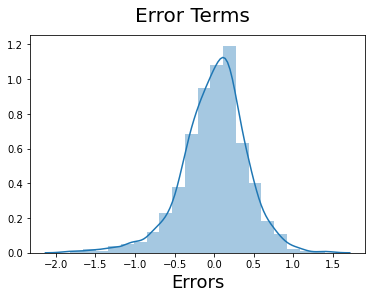

In [55]:
# plot the errors to see if they are normally distributed
fig = plt.figure()
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  
sns.distplot((y_train - y_pred), bins = 20)

In [56]:
# Now we do predictive analysis
df_test[numericals]= scaler.transform(df_test[numericals])

y_test = df_test.pop('count')
X_test = df_test

X_test_1 = X_test[X.columns]
X_test_1 = sm.add_constant(X_test_1)
y_pred = lm.predict(X_test_1)

In [59]:
# MODEL EVALUATION

<AxesSubplot:ylabel='count'>

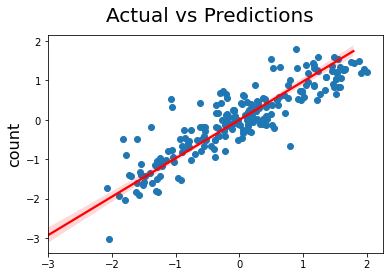

In [60]:
# we use regplot here to compare the predictions versus the test data
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predictions', fontsize=16)
sns.regplot(y_pred, y_test, scatter = 0, color = 'r')

In [61]:
# R2 score calculation
r2_score(y_test, y_pred)

0.7911553831774946